### All Imports

In [1]:
import numpy as np
import pandas as pd
import random
from lazypredict.Supervised import LazyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
warnings.filterwarnings("ignore")


### Initializing the default values for seed and train test split

In [2]:
# Load your dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

# Define the features (X) and the target variable (y)
# seed = random.randint(1000, 9999)   # 7458
seed = 7458

X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=seed)


### Using Lazy Predict to test all models accuracy

In [3]:
import sys
import io

# to remove unnecessary warnings
# Redirect stdout
old_stdout = sys.stdout
sys.stdout = io.StringIO()

# Fit the models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Restore stdout
sys.stdout = old_stdout  # to remove unnecessary warnings

# Print only the models
print(models)


100%|██████████| 31/31 [00:00<00:00, 41.70it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.65               0.64     0.64      0.65   
RandomForestClassifier             0.65               0.63     0.63      0.64   
BaggingClassifier                  0.65               0.63     0.63      0.64   
ExtraTreesClassifier               0.62               0.59     0.59      0.61   
XGBClassifier                      0.62               0.58     0.58      0.60   
Perceptron                         0.54               0.55     0.55      0.54   
LabelPropagation                   0.58               0.55     0.55      0.56   
LabelSpreading                     0.58               0.55     0.55      0.56   
AdaBoostClassifier                 0.54               0.54     0.54      0.54   
LGBMClassifier                     0.54               0.53     0.53      0.54   
ExtraTreeClassifier         

### Observation
| Classifier                | Accuracy | Balanced Accuracy | ROC AUC | F1 Score |
|---------------------------|----------|-------------------|---------|----------|
| DecisionTreeClassifier     | 0.65     | 0.64              | 0.64    | 0.65     |
| RandomForestClassifier     | 0.65     | 0.63              | 0.63    | 0.64     |
| BaggingClassifier          | 0.65     | 0.63              | 0.63    | 0.64     |


Based on the results of Lazy Predict, we choose the **top 3 models** which are **Decision Tree Classifier**, **Random Forest Classifier** and **BaggingClassifier**

# Decision Tree Classifier

In [4]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=seed)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6538461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.69      0.73      0.71        15

    accuracy                           0.65        26
   macro avg       0.64      0.64      0.64        26
weighted avg       0.65      0.65      0.65        26



Observation:

# Random Forest Classifier 

In [5]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=seed)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



# BaggingClassifier

In [6]:


bg = BaggingClassifier(random_state=seed)
bg.fit(X_train, y_train)
y_pred_bg = bg.predict(X_test)
print("BaggingClassifier Classification Report:")
print(classification_report(y_test, y_pred_bg))


BaggingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.65      0.73      0.69        15

    accuracy                           0.62        26
   macro avg       0.60      0.59      0.59        26
weighted avg       0.61      0.62      0.61        26



# Confusion Matrix

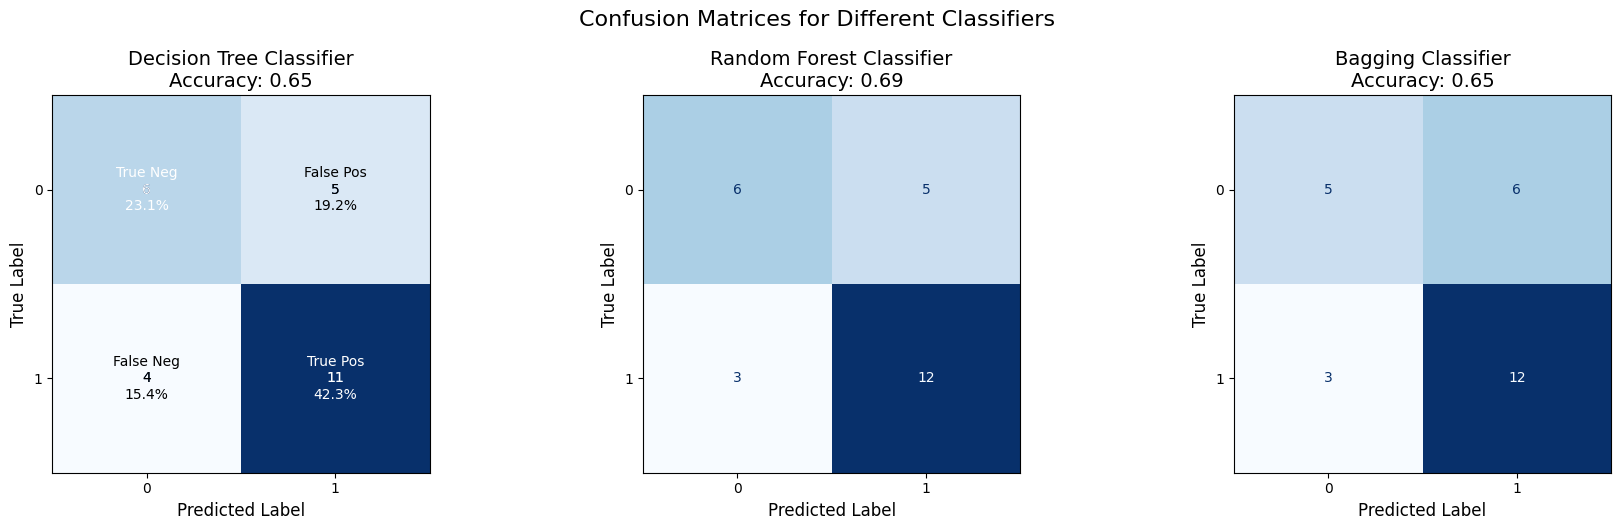

In [7]:
# Initialize classifiers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming seed, X_train, X_test, y_train, y_test are already defined
seed = 42  # Replace with your actual seed if different

# Initialize classifiers
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
bagging = BaggingClassifier(random_state=seed)

# Train classifiers
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
bagging.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_bagging = bagging.predict(X_test)

# Confusion matrices
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Get class labels (if binary classification)
class_names = sorted(list(set(y_test)))

# Set up the figure with proper sizing
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of models, their names, and confusion matrices
models = [dt, rf, bagging]
model_names = ["Decision Tree", "Random Forest", "Bagging"]
conf_matrices = [conf_matrix_dt, conf_matrix_rf, conf_matrix_bagging]

# Plot confusion matrices with better formatting
for i, (model, name, cm) in enumerate(zip(models, model_names, conf_matrices)):
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=class_names)
    disp.plot(
        ax=axes[i],
        cmap=plt.cm.Blues,
        values_format='d',
        colorbar=False,
    )
    disp.ax_.set_title(
        f'{name} Classifier\nAccuracy: {(cm[0, 0] + cm[1, 1]) / cm.sum():.2f}', fontsize=14)
    disp.ax_.set_xlabel('Predicted Label', fontsize=12)
    disp.ax_.set_ylabel('True Label', fontsize=12)

    # Add TN, FP, FN, TP labels in the cells (for binary classification)
    if cm.shape == (2, 2):
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = ["{0:.1%}".format(
            value) for value in cm.flatten()/np.sum(cm)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(
            group_names, group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)

        # Add these labels to the heatmap
        for j in range(cm.shape[0]):
            for k in range(cm.shape[1]):
                if i == 0:  # Only add detailed labels on the first plot to avoid clutter
                    axes[i].text(k, j, labels[j, k],
                                 ha='center', va='center', color='black' if cm[j, k] < cm.max()/2 else 'white')

plt.tight_layout()
plt.suptitle("Confusion Matrices for Different Classifiers",
             fontsize=16, y=1.05)
plt.show()


# Observation:
### Based on above results we can see that the best algorithm at predicting class 0 unhappy customers is Decision Tree is the better model of the 3 since it has an  **f1 score of 0.57** which is higher than the other 2 models. and 
### **11 for true negatives in the confusion matrix.**

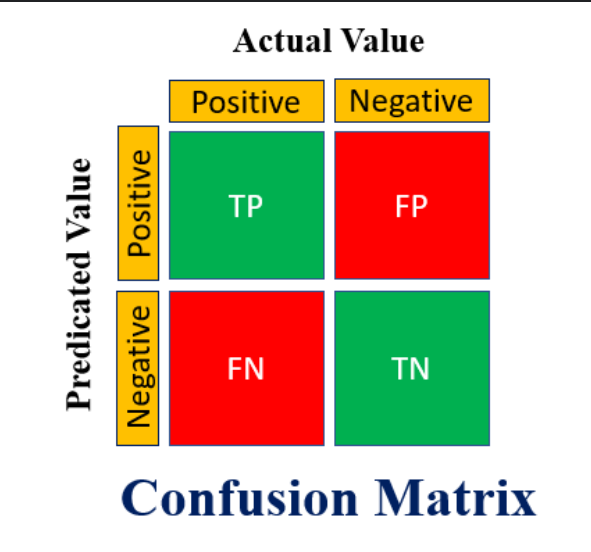

### Ensemble Techniques: Stacking and Voting 

In [8]:
# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
bg = BaggingClassifier(random_state=seed)

# Stacking
estimators = [
    ('dt', dt),
    ('rf', rf),
    ('bg', bg)
]

# Create stacking classifier with RandomForest as final estimator
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(random_state=seed),
    cv=5
)

# Fit and predict using stacking
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

# Print classification report for stacking
print("Stacking Classification Report:")
print(classification_report(y_stack_test, y_pred_stack))


# Voting (both hard and soft voting)
voting_hard = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Fit and predict using hard voting
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)

# Fit and predict using soft voting
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)

# Print classification reports for voting
print("\nHard Voting Classification Report:")
print(classification_report(y_test, y_pred_hard))

print("\nSoft Voting Classification Report:")
print(classification_report(y_test, y_pred_soft))


Stacking Classification Report:


NameError: name 'y_stack_test' is not defined

# Confusion matrix of Stacking

In [ ]:
conf_matrix_stack = confusion_matrix(y_stack_test, y_pred_stack)
print(conf_matrix_stack)


[[ 7  4]
 [ 4 11]]


### Result: Stacking has improved f1 score from 0.5 to 0.64 , which is 14% improvement  (add info about voting classifier and why it was not chosen)

# Testing other models:   **Xgboost** and **lighgbm** 

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# LightGBM
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)

print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.62      0.67      0.65        15

    accuracy                           0.58        26
   macro avg       0.56      0.56      0.56        26
weighted avg       0.57      0.58      0.57        26

[LightGBM] [Info] Number of positive: 54, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540000 -> initscore=0.160343
[LightGBM] [Info] Start training from score 0.160343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

## Observation:

Out of the 2 models , Xgboost has a higher f1score for class 0 , which is also higher than Decision Tree Classifier ; 0.62 / 0.57 respectively


# Confusion Matrix Xgboost

In [ ]:
conf_matrix_stack = confusion_matrix(y_stack_test, y_pred_stack)
print(conf_matrix_stack)


[[ 7  4]
 [ 4 11]]


# Add a confusion matrix for LightGBM

### Observation: Confusion matrix has only improved for Class 1 which we are not interested in 


### Now that we experimented with both LightBGM and XGboost , let's see if we can get better performance using Recursive Feature Elimination by eliminiating features that are not important

# Recursive Feature Elimination


In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

# Print results for each feature
for i, col in enumerate(X.columns):
    print(f"{col}: selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

# Alternative: Get selected features as a list
selected_features = X.columns[rfe.support_].tolist()
print("\nSelected features:", selected_features)


X1: selected=True rank=1
X2: selected=True rank=1
X3: selected=False rank=2
X4: selected=False rank=4
X5: selected=True rank=1
X6: selected=False rank=3

Selected features: ['X1', 'X2', 'X5']


### Based on the output the selected features are:

- **'X1'**: add description
- **'X2'**: - 
- **'X3'**: -

### Testing new model accuracy of **Decision Tree Classifier** with the selected features via the Recursive feature elimination


In [ ]:
X = df[selected_features]  # passing in selected features from rfe
y = df['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=.2, random_state=seed)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 5. Make predictions on test set
y_pred = model.predict(X_test)

# 6. Print results
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")

print(classification_report(y_test, y_pred))



Accuracy: 0.6153846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.73      0.53      0.62        15

    accuracy                           0.62        26
   macro avg       0.63      0.63      0.62        26
weighted avg       0.65      0.62      0.62        26



# Xgboost Accuracy with RFE results

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=seed
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.77      0.67      0.71        15

    accuracy                           0.69        26
   macro avg       0.69      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26



Observation : Xgboost after RFE gives **f1-score** of **0.67** where as Decision Tree Classifer gives **f1-score** after RFE as **0.62** for **class 0**

Now that we selected the most important and impactful features , let's see if we can further improve the accuracy of the model for class 0 unhappy customers using state of the art hyperparameter optimizations

### Applying State of the art Hyperparameter Optimizations to overall best performing model **XGboost**

100%|██████████| 200/200 [00:13<00:00, 14.80trial/s, best loss: -0.7272727272727273]
Best parameters found: {'max_depth': 7, 'learning_rate': 0.0761215592221903, 'n_estimators': 400, 'min_child_weight': 1, 'gamma': 4.2155095817293875e-08, 'subsample': 0.9117757979226273, 'colsample_bytree': 0.8324860943692641, 'scale_pos_weight': 2, 'max_delta_step': 9}
[0]	validation_0-logloss:0.68038
[1]	validation_0-logloss:0.68009
[2]	validation_0-logloss:0.67697
[3]	validation_0-logloss:0.66941
[4]	validation_0-logloss:0.67278
[5]	validation_0-logloss:0.66778
[6]	validation_0-logloss:0.67059
[7]	validation_0-logloss:0.67473
[8]	validation_0-logloss:0.68022
[9]	validation_0-logloss:0.68478
[10]	validation_0-logloss:0.68339
[11]	validation_0-logloss:0.68230
[12]	validation_0-logloss:0.68769
[13]	validation_0-logloss:0.68492
[14]	validation_0-logloss:0.68991
[15]	validation_0-logloss:0.68687
[16]	validation_0-logloss:0.68467
[17]	validation_0-logloss:0.68328
[18]	validation_0-logloss:0.68088
[19]	val

<Figure size 1000x600 with 0 Axes>

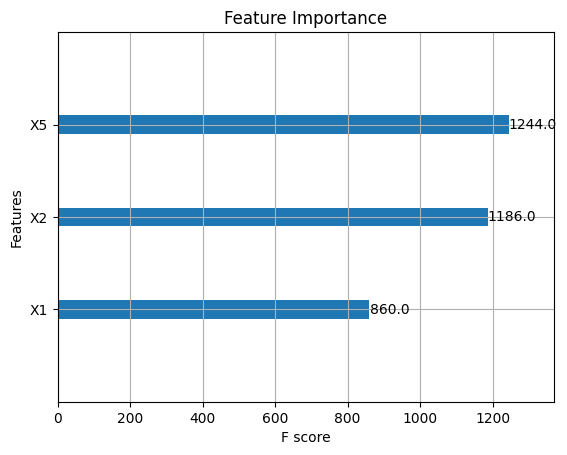

In [ ]:
X = df[selected_features]
y = df['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

# Modified search space focusing on parameters that help with imbalanced data
space = {
    'max_depth': hp.choice('max_depth', range(3, 8)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.choice('n_estimators', range(100, 501, 50)),
    'min_child_weight': hp.choice('min_child_weight', range(1, 6)),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(0.5)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0),
    # Added for imbalanced data
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 2, 3, 4, 5]),
    # Added for imbalanced data
    'max_delta_step': hp.choice('max_delta_step', range(1, 10))
}


def objective(params):
    # Create XGBoost classifier with the suggested parameters
    model = xgb.XGBClassifier(
        **params,
        random_state=seed,
        use_label_encoder=False
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate f1 score specifically for class 0
    f1 = f1_score(y_test, y_pred, pos_label=0)

    # We want to maximize f1 score, so return negative
    return {'loss': -f1, 'status': STATUS_OK}


# Run the optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,  # Increased number of trials
    trials=trials
)

# Convert the best parameters
best_params = {
    'max_depth': best['max_depth'] + 3,
    'learning_rate': best['learning_rate'],
    'n_estimators': best['n_estimators'] * 50 + 100,
    'min_child_weight': best['min_child_weight'] + 1,
    'gamma': best['gamma'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'scale_pos_weight': best['scale_pos_weight'] + 1,
    'max_delta_step': best['max_delta_step'] + 1
}

print("Best parameters found:", best_params)

# Train final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    random_state=seed,
    use_label_encoder=False
)

# Add sample weights to focus on class 0
sample_weights = np.where(y_train == 0, 2, 1)

# Fit the final model
final_model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Make predictions
y_pred = final_model.predict(X_test)

# Print final results
print("\nFinal Model Performance:")
print(classification_report(y_test, y_pred))

# Track the best f1 score for class 0
best_f1 = f1_score(y_test, y_pred, pos_label=0)
print(f"\nBest F1 Score for Class 0: {best_f1:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model)
plt.title('Feature Importance')
plt.show()


# Add observation here:

In [ ]:
import joblib

# Train final model with best parameters
final_model = xgb.XGBClassifier(
    **best_params,
    random_state=seed,
    use_label_encoder=False
)

# Save the best model to a file
joblib.dump(final_model, 'best_model.joblib')


['best_model.joblib']

# Final conclusion : recommendation for company , what was acheived,summarize what you did